<a href="https://colab.research.google.com/github/AaronM44/DAOTW-Assignment-1/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAOTW Assignment 2

--- 

## Introduction

We have been asked to investigate the relationship between weather and the number of traffic collisions on any given day. We will then be required to create both linear regression and deep neural network models that can be used to accurately predict the number of collisions on a particular day.

In part one we created a collated dataset in BigQuery from the NYPD Collisions data and the NOAA weather data for New York City between 2012 and 2020. Exploratory data analysis was then performed in order to understand which variables were best correlated with the number of collisions on a particular day. The data was then prepared for modelling by handling rows with NAs, performing one-hot encoding where appropriate and splitting data into training and testing sets ready for this exercise. These data sets were then exported and stored in GitHub.

In this second part, we'll create multiple regression models, both linear and deep neural networks using the datasets prepared in part one. We will evaluate which model is best using the Mean Absolute Error metric, plots of predicted values versus actual values and the distribution of errors. 

## Import Packages

In [694]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [695]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras import callbacks

print(tf.__version__)

2.9.2


## Data Preparation

Most of the preparation had already been done in Assignment 1. All NAs had been dealt with accordingly based on the column data. Each dataset created in the previous assignment had been split into training and testing sets at a 70/30 ratio. The split was created using a random sample of 70% for the training set with the remaining 30% being used for testing.

The datasets created had been either normalised or standardised in the prior assignment and therefore I had to go back and rework these as Keras already provides a normalisation layer. 

I was interested in seeing the difference, if any, between normalising the features on a scale from 0 to 1 using Min-Max Normalisation or standardising the features using the Z-Score method where values have a mean of zero and a standard deviation of 1. However, I could not figure out how this was done in Tensorflow.

## Methodology

The following method was used to create each model. One slight variation between the linear regression models and deep neural networks was the use of a function to build and compile the deep neural networks. This was done as each model used the same configuration of layers.

The datasets were read in from the GitHub repository. These were outputs from the previous assignment and were already split into training and testing sets.

As stated in the Data Preparation section we had already dealt with NAs previously but a count was performed nonetheless in order to double check.

An overview of the datasets was printed out as a second check to make sure it matched expectations based on the previous assignment.

A copy of the datasets were created to separate out the features and labels. The reason for creating a copy was because if any issues occured it would be easier to compare against an original version of the data.

The first step in creating each model was to create a normaliser layer in order to standardise the input weights. This was done using the built-in function within Keras.

A sequential model was then created with the normaliser layer and a Dense layer. The deep neural networks additionally contained two hidden layers with 64 units using the ReLu activation function. Mean absolute error was used as the loss function for each model. The model was then compiled and run for 100 epochs originally with a 20% validation split. 

A plot showing the training loss and validation loss over time was created to visualise how the model converges.

The number of epochs were then adjusted in order to try and improve the performance of the model. The loss plots for the linear regression models showed that after 100 epochs the loss was still decreasing so increasing the number of epochs here increased the performance of these models significantly. The opposite was true for the deep neural network models which reached a point of convergence after around 5-20 epochs in most cases. For these models, a reduction in number of epochs was appropriate in order to avoid overfitting. This resulted in a slight performance increase.

The tweaking of epochs led me to do a bit of research on finding the optimal number and through this I learned that we can implement a built-in function of Keras called early stopping callbacks which will stop training after the validation loss starts to increase (Chen 2020). The number of epochs for each model was then set to 200 as this was higher than necessary for each model. This callback function was then applied to each of the models.

The model evaluation results were then saved to a dictionary so they could be compared in the evaluation section at the end.





## Linear Regression

### Simple Linear Regression (Temperature)

In order to get a baseline a simple linear regression model was created using temperature as the independent variable.

#### Read Data

##### Training Data

In [696]:
url = "https://raw.githubusercontent.com/AaronM44/DAOTW-Assignment-1/main/outputs/col_mod_1_train.csv"

raw_col_mod_train_1 = pd.read_csv(url)

df_col_mod_train_1 = raw_col_mod_train_1.copy()

df_col_mod_train_1 = df_col_mod_train_1.drop(df_col_mod_train_1.columns[[0, 1]], axis=1)

df_col_mod_train_1.head()

,year,mo,day,temp,visib,num_collisions
0,2017,2,1,5.5,10.0,428
1,2014,4,1,8.1,10.0,597
2,2018,1,1,1.7,9.9,720
3,2019,4,3,8.6,10.0,621
4,2016,12,2,5.4,10.0,711


##### Test Data

In [697]:
url = "https://raw.githubusercontent.com/AaronM44/DAOTW-Assignment-1/main/outputs/col_mod_1_test.csv"

raw_col_mod_test_1 = pd.read_csv(url)

df_col_mod_test_1 = raw_col_mod_test_1.copy()

df_col_mod_test_1 = df_col_mod_test_1.drop(df_col_mod_test_1.columns[[0, 1]], axis=1)

df_col_mod_test_1.head()

,year,mo,day,temp,visib,num_collisions
0,2013,1,4,-5.7,10.0,549
1,2013,1,6,2.9,10.0,389
2,2013,1,5,3.3,10.0,660
3,2013,1,2,5.7,9.5,516
4,2013,1,3,5.3,7.0,578


#### Check for NAs

In [698]:
df_col_mod_train_1.isna().sum()

year              0
mo                0
day               0
temp              0
visib             0
num_collisions    0
dtype: int64

#### Overview of data

In [699]:
df_col_mod_train_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1766.0,2016.017554,2.019797,2013.0,2014.000,2016.0,2018.00,2019.0
mo,1766.0,6.505663,3.432674,1.0,4.000,7.0,9.00,12.0
day,1766.0,4.016421,1.996672,1.0,2.000,4.0,6.00,7.0
temp,1766.0,10.883126,7.838086,-12.6,4.700,11.2,17.70,25.2
visib,1766.0,8.307418,2.195294,0.2,7.025,9.4,10.00,10.0
num_collisions,1766.0,599.751416,95.446688,355.0,532.000,601.0,665.75,845.0


#### Separate Features and Labels

In [700]:
df_col_mod_train_1_feat = df_col_mod_train_1.copy()
df_col_mod_test_1_feat = df_col_mod_test_1.copy()

df_col_mod_train_1_lab = df_col_mod_train_1_feat.pop('num_collisions')
df_col_mod_test_1_lab = df_col_mod_test_1_feat.pop('num_collisions')

#### Create Model

##### Create Normaliser Layer

In [701]:
normaliser = tf.keras.layers.Normalization(axis=-1)

normaliser.adapt(np.array(df_col_mod_train_1_feat))

print(normaliser.mean.numpy())

[[2016.018    6.506    4.016   10.883    8.307]]


##### Create Sequential Model

In [702]:
temp = np.array(df_col_mod_train_1_feat['temp'])

temp_normaliser = layers.Normalization(input_shape=[1,], axis=None)
temp_normaliser.adapt(temp)

In [703]:
temp_model = tf.keras.Sequential([
    temp_normaliser,
    layers.Dense(units=1)
])

temp_model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_91 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_87 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [704]:
temp_model.predict(temp)

56/56 [==============================] - 0s 2ms/step


array([[ 0.986],
       [ 0.51 ],
       [ 1.681],
       ...,
       [-1.413],
       [-0.095],
       [-1.779]], dtype=float32)

##### Configure Training Procedure

In [705]:
temp_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

##### Create Callback

In [706]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

##### Execute Model

In [707]:
%%time
history = temp_model.fit(
    df_col_mod_train_1_feat['temp'],
    df_col_mod_train_1_lab,
    epochs=200,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    callbacks = [earlystopping])

CPU times: user 18.5 s, sys: 1.11 s, total: 19.6 s
Wall time: 18.1 s


##### Plot Loss

In [708]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [num_collisions]')
  plt.legend()
  plt.grid(True)

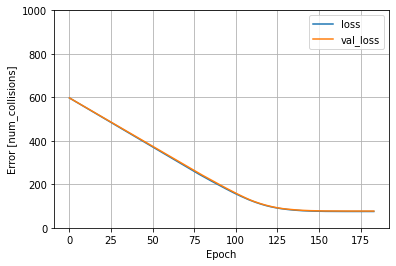

In [709]:
plot_loss(history)

##### Collect Results

In [710]:
test_results = {}

test_results['temp_model'] = temp_model.evaluate(
    df_col_mod_test_1_feat['temp'],
    df_col_mod_test_1_lab, verbose=0)

In [711]:
for model in test_results:
  print("Key : {} , Value : {}".format(model, test_results[model]))

Key : temp_model , Value : 73.28533172607422


##### View Predictions

For the simple regression model we can plot the independent/dependent variable on a scatter chart to get an idea of how the model performed. 

In [712]:
x = tf.linspace(0.0, 30, 31)
y = temp_model.predict(x)

1/1 [==============================] - 0s 58ms/step


In [713]:
def plot_temp(x, y):
  plt.scatter(df_col_mod_train_1_feat['temp'], df_col_mod_train_1_lab, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Temperature')
  plt.ylabel('Num. Collisions')
  plt.legend()

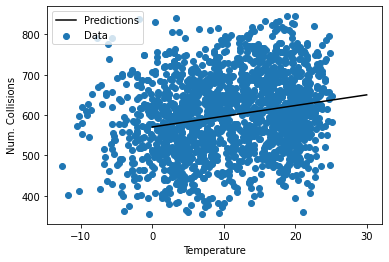

In [714]:
plot_temp(x, y)

Temperature by itself is not a very good predictor for the number of collisions but we do see a general trend indicating an increase in collisions as temperature increases so the prediction line here is as expected.

### Without One-Hot Encoding

For the first multiple linear regression model we can use the same dataset as the simple model just with all of the variables included.

Predictors:

* Year
* Month
* Day of Week
* Temperature
* Visibility



#### Create Model

##### Normaliser Layer

In [715]:
col_mod_1_normaliser = tf.keras.layers.Normalization(axis=-1)

normaliser.adapt(np.array(df_col_mod_train_1_feat))

print(normaliser.mean.numpy())

[[2016.018    6.506    4.016   10.883    8.307]]


##### Create Sequential Model

In [716]:
col_mod_1 = np.array(df_col_mod_train_1_feat)

col_mod_1_normaliser = layers.Normalization(axis=-1)
col_mod_1_normaliser.adapt(np.array(df_col_mod_train_1_feat))

In [717]:
col_mod_1_model = tf.keras.Sequential([
    col_mod_1_normaliser,
    layers.Dense(units=1)
])

col_mod_1_model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_93 (Normaliza  (None, 5)                11        
 tion)                                                           
                                                                 
 dense_88 (Dense)            (None, 1)                 6         
                                                                 
Total params: 17
Trainable params: 6
Non-trainable params: 11
_________________________________________________________________


In [718]:
col_mod_1_model.predict(col_mod_1)

56/56 [==============================] - 0s 1ms/step


array([[-0.065],
       [-0.967],
       [ 0.437],
       ...,
       [-0.19 ],
       [-0.585],
       [-0.986]], dtype=float32)

In [719]:
col_mod_1_model.layers[1].kernel

<tf.Variable 'dense_88/kernel:0' shape=(5, 1) dtype=float32, numpy=
array([[ 0.503],
       [-0.006],
       [ 0.087],
       [-0.457],
       [-0.648]], dtype=float32)>

##### Configure Training Procedure

In [720]:
col_mod_1_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

##### Create Callback

In [721]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

##### Execute Model

In [722]:
%%time
history = col_mod_1_model.fit(
    df_col_mod_train_1_feat,
    df_col_mod_train_1_lab,
    epochs=200,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    callbacks = [earlystopping])

CPU times: user 16.1 s, sys: 931 ms, total: 17 s
Wall time: 20.9 s


##### Plot Loss

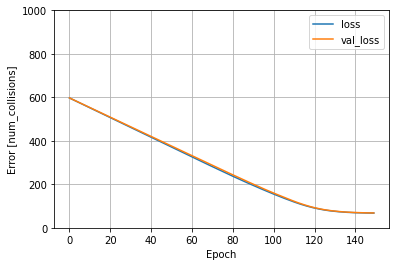

In [723]:
plot_loss(history)

##### Collect Results

In [724]:
test_results['col_mod_1'] = col_mod_1_model.evaluate(
    df_col_mod_test_1_feat,
    df_col_mod_test_1_lab, verbose=0)

In [725]:
for model in test_results:
  print("Key : {} , Value : {}".format(model, test_results[model]))

Key : temp_model , Value : 73.28533172607422
Key : col_mod_1 , Value : 66.53189086914062


### With One-Hot Encoding

#### Read Data

##### Training Data

In [726]:
url = "https://raw.githubusercontent.com/AaronM44/DAOTW-Assignment-1/main/outputs/col_mod_2_train.csv"

raw_col_mod_train_2 = pd.read_csv(url)

df_col_mod_train_2 = raw_col_mod_train_2.copy()

df_col_mod_train_2 = df_col_mod_train_2.drop(df_col_mod_train_2.columns[[0, 1]], axis=1)

df_col_mod_train_2.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,...,mon,tue,wed,thu,fri,sat,sun,temp,visib,num_collisions
0,2017,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,8.2,5.7,551
1,2017,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,-6.1,4.9,462
2,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,11.2,6.5,666
3,2018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,18.0,8.0,529
4,2016,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,15.2,10.0,652


##### Test Data

In [727]:
url = "https://raw.githubusercontent.com/AaronM44/DAOTW-Assignment-1/main/outputs/col_mod_2_test.csv"

raw_col_mod_test_2 = pd.read_csv(url)

df_col_mod_test_2 = raw_col_mod_test_2.copy()

df_col_mod_test_2 = df_col_mod_test_2.drop(df_col_mod_test_2.columns[[0, 1]], axis=1)

df_col_mod_test_2.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,...,mon,tue,wed,thu,fri,sat,sun,temp,visib,num_collisions
0,2013,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,-2.5,10.0,480
1,2013,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.1,10.0,505
2,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2.2,8.8,521
3,2013,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,3.3,10.0,660
4,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,5.9,7.1,475


#### Check for NAs

In [728]:
df_col_mod_train_2.isna().sum()

year              0
jan               0
feb               0
mar               0
apr               0
may               0
jun               0
jul               0
aug               0
sep               0
oct               0
nov               0
dec               0
mon               0
tue               0
wed               0
thu               0
fri               0
sat               0
sun               0
temp              0
visib             0
num_collisions    0
dtype: int64

#### Overview of Data

In [729]:
df_col_mod_train_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1766.0,2016.032843,2.003410,2013.0,2014.00,2016.0,2018.0,2019.0
jan,1766.0,0.082673,0.275465,0.0,0.00,0.0,0.0,1.0
feb,1766.0,0.080974,0.272872,0.0,0.00,0.0,0.0,1.0
mar,1766.0,0.082673,0.275465,0.0,0.00,0.0,0.0,1.0
apr,1766.0,0.087769,0.283039,0.0,0.00,0.0,0.0,1.0
may,1766.0,0.086636,0.281381,0.0,0.00,0.0,0.0,1.0
jun,1766.0,0.083805,0.277174,0.0,0.00,0.0,0.0,1.0
jul,1766.0,0.087203,0.282212,0.0,0.00,0.0,0.0,1.0
aug,1766.0,0.087769,0.283039,0.0,0.00,0.0,0.0,1.0
sep,1766.0,0.077576,0.267580,0.0,0.00,0.0,0.0,1.0


#### Separate Features and Labels

In [730]:
df_col_mod_train_2_feat = df_col_mod_train_2.copy()
df_col_mod_test_2_feat = df_col_mod_test_2.copy()

df_col_mod_train_2_lab = df_col_mod_train_2_feat.pop('num_collisions')
df_col_mod_test_2_lab = df_col_mod_test_2_feat.pop('num_collisions')

#### Model

##### Normaliser Layer

In [731]:
normaliser = tf.keras.layers.Normalization(axis=-1)

normaliser.adapt(np.array(df_col_mod_train_2_feat))

print(normaliser.mean.numpy())

[[2016.033    0.083    0.081    0.083    0.088    0.087    0.084    0.087
     0.088    0.078    0.09     0.078    0.075    0.143    0.143    0.143
     0.146    0.142    0.146    0.137   10.914    8.304]]


##### Create Sequential Model

In [732]:
col_mod_2 = np.array(df_col_mod_train_2_feat)

col_mod_2_normaliser = layers.Normalization(axis=-1)
col_mod_2_normaliser.adapt(np.array(df_col_mod_train_2_feat))

In [733]:
col_mod_2_model = tf.keras.Sequential([
    col_mod_2_normaliser,
    layers.Dense(units=1)
])

col_mod_2_model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_95 (Normaliza  (None, 22)               45        
 tion)                                                           
                                                                 
 dense_89 (Dense)            (None, 1)                 23        
                                                                 
Total params: 68
Trainable params: 23
Non-trainable params: 45
_________________________________________________________________


In [734]:
col_mod_2_model.predict(col_mod_2)

56/56 [==============================] - 0s 2ms/step


array([[ 0.433],
       [-1.88 ],
       [ 0.806],
       ...,
       [-2.305],
       [-0.294],
       [-3.181]], dtype=float32)

In [735]:
col_mod_2_model.layers[1].kernel

<tf.Variable 'dense_89/kernel:0' shape=(22, 1) dtype=float32, numpy=
array([[-0.22 ],
       [ 0.109],
       [-0.466],
       [ 0.36 ],
       [-0.043],
       [ 0.508],
       [-0.495],
       [ 0.063],
       [-0.107],
       [ 0.432],
       [ 0.322],
       [-0.133],
       [-0.447],
       [-0.424],
       [ 0.371],
       [-0.466],
       [ 0.359],
       [ 0.148],
       [-0.328],
       [ 0.453],
       [ 0.059],
       [ 0.192]], dtype=float32)>

##### Configure Training Procedure

In [736]:
col_mod_2_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

##### Create Callback

In [737]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

##### Execute Model

In [738]:
%%time
history = col_mod_2_model.fit(
    df_col_mod_train_2_feat,
    df_col_mod_train_2_lab,
    epochs=200,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    callbacks = [earlystopping])

CPU times: user 16.5 s, sys: 1.03 s, total: 17.6 s
Wall time: 20.9 s


##### Plot Loss

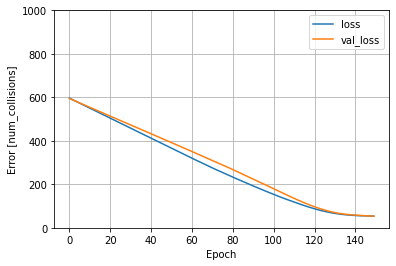

In [739]:
plot_loss(history)

##### Collect Results

In [740]:
test_results['col_mod_2'] = col_mod_2_model.evaluate(
    df_col_mod_test_2_feat,
    df_col_mod_test_2_lab, verbose=0)

In [741]:
for model in test_results:
  print("Key : {} , Value : {}".format(model, test_results[model]))

Key : temp_model , Value : 73.28533172607422
Key : col_mod_1 , Value : 66.53189086914062
Key : col_mod_2 , Value : 53.8358154296875


## Deep Neural Networks

Each of the deep neural networks had been one-hot encoded so the only differences here are the inputs.

### Build and Compile Function

A function was created to build and compile the model as each of the deep neural networks used the same configuration of hidden layers. The function just helps to make the process more efficient.

In [742]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

### DNN 1

Predictors:

* Year
* Month
* Day of Week
* Temperature
* Visibility
* Wind Speed



#### Read Data

##### Training Data

In [743]:
url = "https://raw.githubusercontent.com/AaronM44/DAOTW-Assignment-1/main/outputs/col_dnn_1_train.csv"

raw_col_dnn_1_train = pd.read_csv(url)

df_col_dnn_1_train = raw_col_dnn_1_train.copy()

df_col_dnn_1_train = df_col_dnn_1_train.drop(df_col_dnn_1_train.columns[[0, 1]], axis=1)

df_col_dnn_1_train.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,...,tue,wed,thu,fri,sat,sun,temp,visib,wdsp,num_collisions
0,2016,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,5.7,9.1,12.8,734
1,2016,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,24.7,8.4,16.9,658
2,2014,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,18.3,10.0,5.8,480
3,2013,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,19.3,4.1,12.0,633
4,2013,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,22.1,4.9,10.9,550


##### Test Data

In [744]:
url = "https://raw.githubusercontent.com/AaronM44/DAOTW-Assignment-1/main/outputs/col_dnn_1_test.csv"

raw_col_dnn_1_test = pd.read_csv(url)

df_col_dnn_1_test = raw_col_dnn_1_test.copy()

df_col_dnn_1_test = df_col_dnn_1_test.drop(df_col_dnn_1_test.columns[[0, 1]], axis=1)

df_col_dnn_1_test.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,...,tue,wed,thu,fri,sat,sun,temp,visib,wdsp,num_collisions
0,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3.3,10.0,17.3,381
1,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2.1,9.8,6.8,393
2,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.2,8.8,9.8,521
3,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,4.3,9.8,12.0,513
4,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,5.7,9.5,9.2,516


#### Check for NAs

In [745]:
df_col_dnn_1_train.isna().sum()

year              0
jan               0
feb               0
mar               0
apr               0
may               0
jun               0
jul               0
aug               0
sep               0
oct               0
nov               0
dec               0
mon               0
tue               0
wed               0
thu               0
fri               0
sat               0
sun               0
temp              0
visib             0
wdsp              0
num_collisions    0
dtype: int64

#### Overview of Data

In [746]:
df_col_dnn_1_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1766.0,2015.976784,2.006229,2013.0,2014.00,2016.0,2018.0,2019.0
jan,1766.0,0.088335,0.283862,0.0,0.00,0.0,0.0,1.0
feb,1766.0,0.068516,0.252702,0.0,0.00,0.0,0.0,1.0
mar,1766.0,0.083805,0.277174,0.0,0.00,0.0,0.0,1.0
apr,1766.0,0.090600,0.287121,0.0,0.00,0.0,0.0,1.0
may,1766.0,0.078143,0.268472,0.0,0.00,0.0,0.0,1.0
jun,1766.0,0.088335,0.283862,0.0,0.00,0.0,0.0,1.0
jul,1766.0,0.083239,0.276321,0.0,0.00,0.0,0.0,1.0
aug,1766.0,0.087769,0.283039,0.0,0.00,0.0,0.0,1.0
sep,1766.0,0.079841,0.271124,0.0,0.00,0.0,0.0,1.0


#### Separate Features and Labels

In [747]:
df_col_dnn_1_train_feat = df_col_dnn_1_train.copy()
df_col_dnn_1_test_feat = df_col_dnn_1_test.copy()

df_col_dnn_1_train_lab = df_col_dnn_1_train_feat.pop('num_collisions')
df_col_dnn_1_test_lab = df_col_dnn_1_test_feat.pop('num_collisions')

#### Model

##### Normaliser Layer

In [748]:
normaliser = tf.keras.layers.Normalization(axis=-1)

normaliser.adapt(np.array(df_col_dnn_1_train_feat))

print(normaliser.mean.numpy())

[[2015.976    0.088    0.069    0.084    0.091    0.078    0.088    0.083
     0.088    0.08     0.084    0.082    0.086    0.146    0.143    0.147
     0.147    0.145    0.134    0.139   10.83     8.259   12.364]]


##### Build Model

In [749]:
col_dnn_1 = np.array(df_col_dnn_1_train_feat)
col_dnn_1_normaliser = layers.Normalization(axis=-1)
col_dnn_1_normaliser.adapt(np.array(df_col_dnn_1_train_feat))

In [750]:
col_dnn_1_model = build_and_compile_model(col_dnn_1_normaliser)

col_dnn_1_model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_97 (Normaliza  (None, 23)               47        
 tion)                                                           
                                                                 
 dense_90 (Dense)            (None, 64)                1536      
                                                                 
 dense_91 (Dense)            (None, 64)                4160      
                                                                 
 dense_92 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,808
Trainable params: 5,761
Non-trainable params: 47
_________________________________________________________________


##### Create Callback

In [751]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

##### Execute Model

In [752]:
%%time
history = col_dnn_1_model.fit(
    df_col_dnn_1_train_feat,
    df_col_dnn_1_train_lab,
    validation_split=0.2,
    verbose=0, 
    epochs=100,
    callbacks = [earlystopping])

CPU times: user 4.82 s, sys: 273 ms, total: 5.09 s
Wall time: 5.23 s


##### Plot Loss

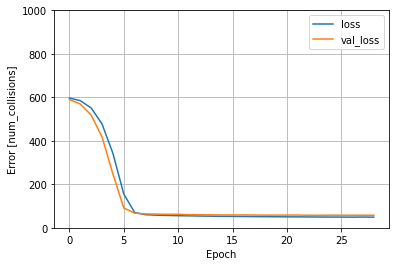

In [753]:
plot_loss(history)

##### Collect Results

In [754]:
test_results['col_dnn_1'] = col_dnn_1_model.evaluate(
    df_col_dnn_1_test_feat, 
    df_col_dnn_1_test_lab, verbose=0)

In [755]:
for model in test_results:
  print("Key : {} , Value : {}".format(model, test_results[model]))

Key : temp_model , Value : 73.28533172607422
Key : col_mod_1 , Value : 66.53189086914062
Key : col_mod_2 , Value : 53.8358154296875
Key : col_dnn_1 , Value : 56.14476776123047


### DNN 2

Predictors:

* Year
* Month
* Day of Week
* Temperature
* Visibility
* Wind Speed
* Surface Level Pressure
* Dew Point Temperature



#### Read Data

##### Training Data

In [756]:
url = "https://raw.githubusercontent.com/AaronM44/DAOTW-Assignment-1/main/outputs/col_dnn_2_train.csv"

raw_col_dnn_2_train = pd.read_csv(url)

df_col_dnn_2_train = raw_col_dnn_2_train.copy()

df_col_dnn_2_train = df_col_dnn_2_train.drop(df_col_dnn_2_train.columns[[0, 1]], axis=1)

df_col_dnn_2_train.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,...,thu,fri,sat,sun,temp,visib,wdsp,slp,dewp,num_collisions
0,2016,0,0,0,0,0,0,0,0,0,...,0,0,1,0,15.8,9.7,14.3,1023.5,12.3,523
1,2018,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-3.7,10.0,16.6,1035.0,-13.9,677
2,2017,0,0,0,0,0,0,1,0,0,...,0,0,0,0,24.2,5.7,9.0,1010.4,20.9,733
3,2019,1,0,0,0,0,0,0,0,0,...,0,0,0,0,6.9,5.6,15.4,997.6,4.2,514
4,2016,0,0,0,0,0,0,0,1,0,...,0,0,0,0,23.1,4.7,12.8,1018.5,22.1,672


##### Test Data

In [757]:
url = "https://raw.githubusercontent.com/AaronM44/DAOTW-Assignment-1/main/outputs/col_dnn_2_test.csv"

raw_col_dnn_2_test = pd.read_csv(url)

df_col_dnn_2_test = raw_col_dnn_2_test.copy()

df_col_dnn_2_test = df_col_dnn_2_test.drop(df_col_dnn_2_test.columns[[0, 1]], axis=1)

df_col_dnn_2_test.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,...,thu,fri,sat,sun,temp,visib,wdsp,slp,dewp,num_collisions
0,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-2.5,10.0,14.3,1013.4,-11.1,480
1,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-5.7,10.0,11.3,1018.1,-13.4,549
2,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.1,10.0,13.0,1015.2,-6.1,505
3,2013,1,0,0,0,0,0,0,0,0,...,0,1,0,0,2.1,9.8,6.8,1019.7,-0.4,393
4,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,4.4,6.8,6.1,1026.2,3.1,487


#### Check for NAs

In [758]:
df_col_dnn_2_train.isna().sum()

year              0
jan               0
feb               0
mar               0
apr               0
may               0
jun               0
jul               0
aug               0
sep               0
oct               0
nov               0
dec               0
mon               0
tue               0
wed               0
thu               0
fri               0
sat               0
sun               0
temp              0
visib             0
wdsp              0
slp               0
dewp              0
num_collisions    0
dtype: int64

#### Overview of Data

In [759]:
df_col_dnn_2_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1766.0,2015.983012,1.996809,2013.0,2014.0,2016.00,2018.0,2019.0
jan,1766.0,0.082673,0.275465,0.0,0.0,0.00,0.0,1.0
feb,1766.0,0.070781,0.256532,0.0,0.0,0.00,0.0,1.0
mar,1766.0,0.087769,0.283039,0.0,0.0,0.00,0.0,1.0
apr,1766.0,0.078143,0.268472,0.0,0.0,0.00,0.0,1.0
may,1766.0,0.083805,0.277174,0.0,0.0,0.00,0.0,1.0
jun,1766.0,0.080408,0.272000,0.0,0.0,0.00,0.0,1.0
jul,1766.0,0.090600,0.287121,0.0,0.0,0.00,0.0,1.0
aug,1766.0,0.087203,0.282212,0.0,0.0,0.00,0.0,1.0
sep,1766.0,0.084938,0.278868,0.0,0.0,0.00,0.0,1.0


#### Separate Features and Labels

In [760]:
df_col_dnn_2_train_feat = df_col_dnn_2_train.copy()
df_col_dnn_2_test_feat = df_col_dnn_2_test.copy()

df_col_dnn_2_train_lab = df_col_dnn_2_train_feat.pop('num_collisions')
df_col_dnn_2_test_lab = df_col_dnn_2_test_feat.pop('num_collisions')

#### Model

##### Normaliser Layer

In [761]:
normaliser = tf.keras.layers.Normalization(axis=-1)

normaliser.adapt(np.array(df_col_dnn_2_train_feat))

print(normaliser.mean.numpy())

[[2015.983    0.083    0.071    0.088    0.078    0.084    0.08     0.091
     0.087    0.085    0.091    0.084    0.079    0.144    0.146    0.135
     0.144    0.136    0.147    0.148   10.968    8.337   12.245 1016.92
     6.892]]


##### Build Model

In [762]:
col_dnn_2 = np.array(df_col_dnn_2_train_feat)
col_dnn_2_normaliser = layers.Normalization(axis=-1)
col_dnn_2_normaliser.adapt(np.array(df_col_dnn_2_train_feat))

In [763]:
col_dnn_2_model = build_and_compile_model(col_dnn_2_normaliser)

col_dnn_2_model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_99 (Normaliza  (None, 25)               51        
 tion)                                                           
                                                                 
 dense_93 (Dense)            (None, 64)                1664      
                                                                 
 dense_94 (Dense)            (None, 64)                4160      
                                                                 
 dense_95 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,940
Trainable params: 5,889
Non-trainable params: 51
_________________________________________________________________


##### Create Callback

In [764]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

##### Execute Model

In [765]:
%%time
history = col_dnn_2_model.fit(
    df_col_dnn_2_train_feat,
    df_col_dnn_2_train_lab,
    validation_split=0.2,
    verbose=0, 
    epochs=100,
    callbacks = [earlystopping])

CPU times: user 6.66 s, sys: 361 ms, total: 7.02 s
Wall time: 6.16 s


##### Plot Loss

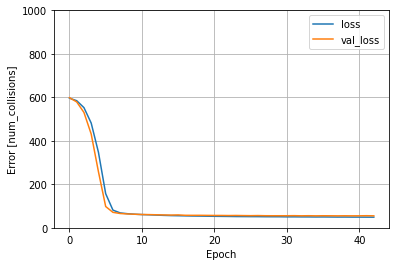

In [766]:
plot_loss(history)

##### Collect Results

In [767]:
test_results['col_dnn_2'] = col_dnn_2_model.evaluate(
    df_col_dnn_2_test_feat, 
    df_col_dnn_2_test_lab, verbose=0)

In [768]:
for model in test_results:
  print("Key : {} , Value : {}".format(model, test_results[model]))

Key : temp_model , Value : 73.28533172607422
Key : col_mod_1 , Value : 66.53189086914062
Key : col_mod_2 , Value : 53.8358154296875
Key : col_dnn_1 , Value : 56.14476776123047
Key : col_dnn_2 , Value : 56.92817687988281


### DNN 3

Predictors:

* Year
* Month
* Day of Week
* Temperature
* Visibility
* Wind Speed
* Surface Level Pressure
* Dew Point Temperature
* Max. Temperature
* Min. Temperature
* Max. Wind Speed
* Fog
* Precipitation



#### Read Data

##### Training Data

In [769]:
url = "https://raw.githubusercontent.com/AaronM44/DAOTW-Assignment-1/main/outputs/col_dnn_3_train.csv"

raw_col_dnn_3_train = pd.read_csv(url)

df_col_dnn_3_train = raw_col_dnn_3_train.copy()

df_col_dnn_3_train = df_col_dnn_3_train.drop(df_col_dnn_3_train.columns[[0, 1]], axis=1)

df_col_dnn_3_train.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,...,visib,wdsp,slp,dewp,max,min,mxpsd,fog,prcp,num_collisions
0,2016,0,0,0,0,0,1,0,0,0,...,10.0,7.6,1009.1,13.5,23.3,12.8,16.1,0,0.00,689
1,2015,0,0,0,0,0,0,0,0,0,...,10.0,13.5,1024.6,-8.3,8.9,-0.6,23.0,0,0.25,733
2,2019,0,0,0,1,0,0,0,0,0,...,10.0,9.7,1027.0,1.8,8.9,1.7,15.0,0,0.00,688
3,2016,0,0,0,0,0,0,0,0,0,...,10.0,8.2,1020.5,3.4,13.9,3.9,12.8,0,0.00,620
4,2014,0,0,0,0,0,0,0,0,1,...,8.6,10.2,1031.0,12.9,20.0,9.4,17.3,0,0.00,491


##### Test Data

In [770]:
url = "https://raw.githubusercontent.com/AaronM44/DAOTW-Assignment-1/main/outputs/col_dnn_3_test.csv"

raw_col_dnn_3_test = pd.read_csv(url)

df_col_dnn_3_test = raw_col_dnn_3_test.copy()

df_col_dnn_3_test = df_col_dnn_3_test.drop(df_col_dnn_3_test.columns[[0, 1]], axis=1)

df_col_dnn_3_test.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,...,visib,wdsp,slp,dewp,max,min,mxpsd,fog,prcp,num_collisions
0,2013,1,0,0,0,0,0,0,0,0,...,10.0,14.3,1013.4,-11.1,0.6,-5.6,18.3,0,0.00,480
1,2013,1,0,0,0,0,0,0,0,0,...,9.8,12.0,1028.8,1.2,8.9,-3.9,19.7,0,0.00,513
2,2013,1,0,0,0,0,0,0,0,0,...,6.8,6.1,1026.2,3.1,7.8,-2.2,12.8,1,0.00,487
3,2013,1,0,0,0,0,0,0,0,0,...,9.5,9.2,1023.1,3.5,9.4,3.9,17.3,0,0.24,516
4,2013,1,0,0,0,0,0,0,0,0,...,7.0,10.1,1018.3,4.4,7.2,4.0,24.2,0,0.35,578


#### Check for NAs

In [771]:
df_col_dnn_3_train.isna().sum()

year              0
jan               0
feb               0
mar               0
apr               0
may               0
jun               0
jul               0
aug               0
sep               0
oct               0
nov               0
dec               0
mon               0
tue               0
wed               0
thu               0
fri               0
sat               0
sun               0
temp              0
visib             0
wdsp              0
slp               0
dewp              0
max               0
min               0
mxpsd             0
fog               0
prcp              0
num_collisions    0
dtype: int64

#### Overview of Data

In [772]:
df_col_dnn_3_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1766.0,2015.995470,2.029522,2013.0,2014.0,2016.00,2018.000,2019.00
jan,1766.0,0.081540,0.273740,0.0,0.0,0.00,0.000,1.00
feb,1766.0,0.073613,0.261214,0.0,0.0,0.00,0.000,1.00
mar,1766.0,0.087203,0.282212,0.0,0.0,0.00,0.000,1.00
apr,1766.0,0.079275,0.270244,0.0,0.0,0.00,0.000,1.00
may,1766.0,0.082673,0.275465,0.0,0.0,0.00,0.000,1.00
jun,1766.0,0.087769,0.283039,0.0,0.0,0.00,0.000,1.00
jul,1766.0,0.082106,0.274605,0.0,0.0,0.00,0.000,1.00
aug,1766.0,0.084371,0.278023,0.0,0.0,0.00,0.000,1.00
sep,1766.0,0.084371,0.278023,0.0,0.0,0.00,0.000,1.00


#### Separate Features and Labels

In [773]:
df_col_dnn_3_train_feat = df_col_dnn_3_train.copy()
df_col_dnn_3_test_feat = df_col_dnn_3_test.copy()

df_col_dnn_3_train_lab = df_col_dnn_3_train_feat.pop('num_collisions')
df_col_dnn_3_test_lab = df_col_dnn_3_test_feat.pop('num_collisions')

#### Model

##### Normaliser Layer

In [774]:
normaliser = tf.keras.layers.Normalization(axis=-1)

normaliser.adapt(np.array(df_col_dnn_3_train_feat))

print(normaliser.mean.numpy())

[[2015.996    0.082    0.074    0.087    0.079    0.083    0.088    0.082
     0.084    0.084    0.083    0.088    0.086    0.144    0.148    0.139
     0.144    0.142    0.14     0.143   10.815    8.347   12.34  1016.705
     6.652   15.335    6.576   19.933    0.251    0.126]]


##### Build Model

In [775]:
col_dnn_3 = np.array(df_col_dnn_3_train_feat)
col_dnn_3_normaliser = layers.Normalization(axis=-1)
col_dnn_3_normaliser.adapt(np.array(df_col_dnn_3_train_feat))

In [776]:
col_dnn_3_model = build_and_compile_model(col_dnn_3_normaliser)

col_dnn_3_model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_101 (Normaliz  (None, 30)               61        
 ation)                                                          
                                                                 
 dense_96 (Dense)            (None, 64)                1984      
                                                                 
 dense_97 (Dense)            (None, 64)                4160      
                                                                 
 dense_98 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6,270
Trainable params: 6,209
Non-trainable params: 61
_________________________________________________________________


##### Create Callback

In [777]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

##### Execute Model

In [778]:
%%time
history = col_dnn_3_model.fit(
    df_col_dnn_3_train_feat,
    df_col_dnn_3_train_lab,
    validation_split=0.2,
    verbose=0, 
    epochs=100,
    callbacks = [earlystopping])

CPU times: user 11.7 s, sys: 670 ms, total: 12.3 s
Wall time: 10.6 s


##### Plot Loss

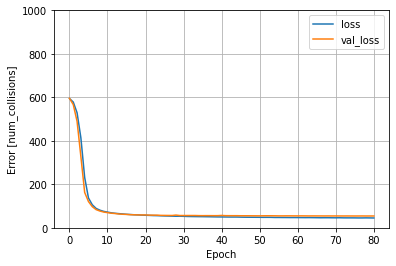

In [779]:
plot_loss(history)

##### Collect Results

In [780]:
test_results['col_dnn_3'] = col_dnn_3_model.evaluate(
    df_col_dnn_3_test_feat, 
    df_col_dnn_3_test_lab, verbose=0)

In [781]:
for model in test_results:
  print("Key : {} , Value : {}".format(model, test_results[model]))

Key : temp_model , Value : 73.28533172607422
Key : col_mod_1 , Value : 66.53189086914062
Key : col_mod_2 , Value : 53.8358154296875
Key : col_dnn_1 , Value : 56.14476776123047
Key : col_dnn_2 , Value : 56.92817687988281
Key : col_dnn_3 , Value : 55.673789978027344


## Evaluation

The models were evaluated mainly using the mean absolute error but also by looking at plots comparing the actual values versus the predicted values and the distribution of error.

When comparing the actual values against the predicted, most of the models performed quite well with the exception of col_mod_1 which was the first multiple regression model created. This model was not one-hot encoded and the chart shows the actual number of collisions per day fell between a range of roughly 400-800 but this model predicted results ranging from 500-700.

The distribution of errors for each model followed a normal distribution for the most part, if not slightly skewed to the right.

In [782]:
pd.DataFrame(test_results, index=['Mean absolute error [num_collisions]']).T

,Mean absolute error [num_collisions]
temp_model,73.285332
col_mod_1,66.531891
col_mod_2,53.835815
col_dnn_1,56.144768
col_dnn_2,56.928177
col_dnn_3,55.673790


The best model in terms of mean absolute error was col_mod_2 which was a linear regression model which was one-hot encoded and contained Year, Month, Day of Week, Temperature and Visibility as predictors.

### Predictions and Error Distributions

#### Linear Regression

##### Without One-Hot Encoding

24/24 [==============================] - 0s 2ms/step


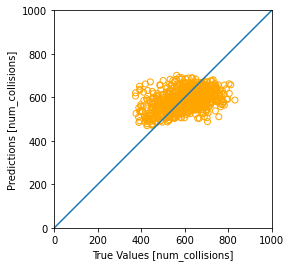

In [783]:
col_mod_1_pred = col_mod_1_model.predict(df_col_mod_test_1_feat).flatten()

a = plt.axes(aspect='equal')
plt.scatter(df_col_mod_test_1_lab, col_mod_1_pred, marker='o', facecolors='none', edgecolors='orange')
plt.xlabel('True Values [num_collisions]')
plt.ylabel('Predictions [num_collisions]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

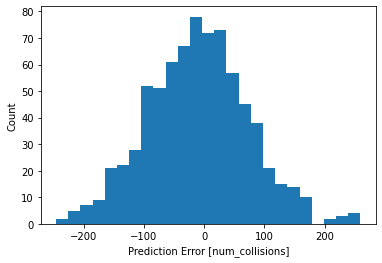

In [784]:
col_mod_1_err = col_mod_1_pred - df_col_mod_test_1_lab
plt.hist(col_mod_1_err, bins=25)
plt.xlabel('Prediction Error [num_collisions]')
_ = plt.ylabel('Count')

##### With One-Hot Encoding

24/24 [==============================] - 0s 2ms/step


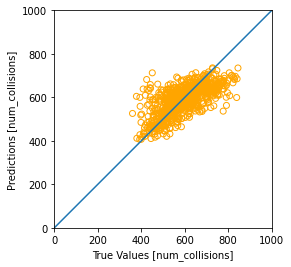

In [785]:
col_mod_2_pred = col_mod_2_model.predict(df_col_mod_test_2_feat).flatten()

a = plt.axes(aspect='equal')
plt.scatter(df_col_mod_test_2_lab, col_mod_2_pred, marker='o', facecolors='none', edgecolors='orange')
plt.xlabel('True Values [num_collisions]')
plt.ylabel('Predictions [num_collisions]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

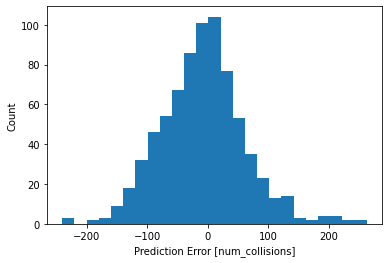

In [786]:
col_mod_2_err = col_mod_2_pred - df_col_mod_test_2_lab
plt.hist(col_mod_2_err, bins=25)
plt.xlabel('Prediction Error [num_collisions]')
_ = plt.ylabel('Count')

#### Deep Neural Networks

##### DNN 1

24/24 [==============================] - 0s 2ms/step


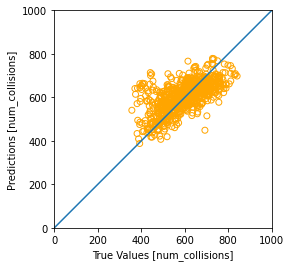

In [787]:
col_dnn_1_pred = col_dnn_1_model.predict(df_col_dnn_1_test_feat).flatten()

a = plt.axes(aspect='equal')
plt.scatter(df_col_dnn_1_test_lab, col_dnn_1_pred, marker='o', facecolors='none', edgecolors='orange')
plt.xlabel('True Values [num_collisions]')
plt.ylabel('Predictions [num_collisions]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

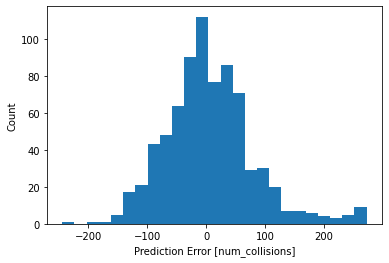

In [788]:
col_dnn_1_err = col_dnn_1_pred - df_col_dnn_1_test_lab
plt.hist(col_dnn_1_err, bins=25)
plt.xlabel('Prediction Error [num_collisions]')
_ = plt.ylabel('Count')

##### DNN 2

24/24 [==============================] - 0s 3ms/step


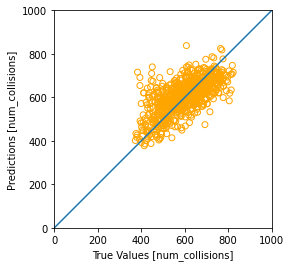

In [789]:
col_dnn_2_pred = col_dnn_2_model.predict(df_col_dnn_2_test_feat).flatten()

a = plt.axes(aspect='equal')
plt.scatter(df_col_dnn_2_test_lab, col_dnn_2_pred, marker='o', facecolors='none', edgecolors='orange')
plt.xlabel('True Values [num_collisions]')
plt.ylabel('Predictions [num_collisions]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

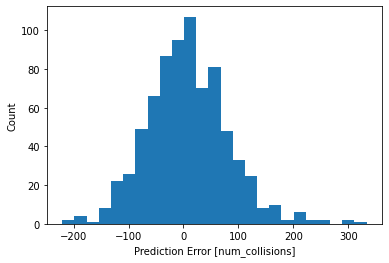

In [790]:
col_dnn_2_err = col_dnn_2_pred - df_col_dnn_2_test_lab
plt.hist(col_dnn_2_err, bins=25)
plt.xlabel('Prediction Error [num_collisions]')
_ = plt.ylabel('Count')

##### DNN 3

24/24 [==============================] - 0s 2ms/step


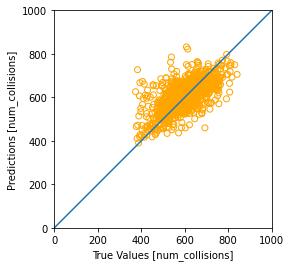

In [791]:
col_dnn_3_pred = col_dnn_3_model.predict(df_col_dnn_3_test_feat).flatten()

a = plt.axes(aspect='equal')
plt.scatter(df_col_dnn_3_test_lab, col_dnn_3_pred, marker = 'o', facecolors='none', edgecolors='orange')
plt.xlabel('True Values [num_collisions]')
plt.ylabel('Predictions [num_collisions]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

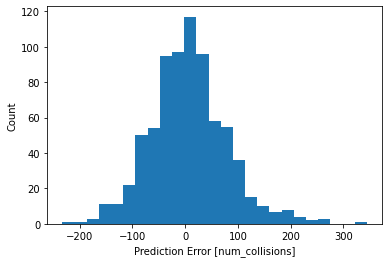

In [792]:
col_dnn_3_err = col_dnn_3_pred - df_col_dnn_3_test_lab
plt.hist(col_dnn_3_err, bins=25)
plt.xlabel('Prediction Error [num_collisions]')
_ = plt.ylabel('Count')

## Conclusion

Overall the best model was the second linear regression model which used Year, Month, Day of Week, Temperature and Visibility as predictor variables. This model had the lowest mean absolute error of ~54. The deep neural networks were all very close to this with a range of mean absolute error values from ~56-57. 

Each of the models using multiple variables were a significant improvement over the simple linear regression model which just used temperature as the predictor.

However, if we were looking for the best combination of accuracy and performance we might consider using one of the deep neural networks. These models were very close in accuracy to the best linear regression models however were significantly faster at reaching convergence. The training time for the linear regression models took around 20 seconds compared to between 5 and 10 seconds for the DNNs depending on the number of inputs. 

## References

Chen, B. (2020). Early Stopping in Practice: an example with Keras and TensorFlow 2.0 [online]. Available at https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd [12th Jan 2023]